In [1]:
%matplotlib inline

In [2]:
# Dependencies and Setup
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd

# Philanthropy Data Analysis by Zingha
> In this Data Analysis, we'll be looking at;
> -  How the Total Donation Amount have changed overall in the last 4 years and;
> -  How each Donor's Source of Wealth contributed to each Cause

### Creating a Graph Analysis for the change in Total Donations in the last 4 years

In [3]:
# Read CSV File
CD15 = pd.read_csv("chronicle_data2015.csv", encoding = "ISO-8859-1")
CD16 = pd.read_csv("chronicle_data2016.csv", encoding = "ISO-8859-1")
CD17 = pd.read_csv("chronicle_data2017.csv", encoding = "ISO-8859-1")
CD18 = pd.read_csv("chronicle_data2018.csv", encoding = "ISO-8859-1")

In [4]:
# Merge all files
Files = [CD15, CD16, CD17, CD18]
CD = pd.concat(Files)
CD.head()

,Year,Donor,Where Donor Lives,Donor's Source of Wealth,Recipient,Recipient Location,Cause,Gift type,Gift Value
0,2015,John Santikos,Texas,Real estate,San Antonio Area Foundation,Texas,Community foundations,Bequest,"$605,000,000"
1,2015,John A. Paulson,New York,Finance,"Harvard U. (Cambridge, Mass.)",Massachusetts,Colleges and universities,Unrestricted,"$400,000,000"
2,2015,Stefan Edlis and Gael Neeson,Illinois,Manufacturing,Art Institute of Chicago,Illinois,Arts,Noncash Gift,"$400,000,000"
3,2015,William H. Scheide,New Jersey,Family wealth,Princeton U. (N.J.),New Jersey,Colleges and universities,Noncash Gift,"$300,000,000"
4,2015,David H. Koch,New York,Oil,Memorial Sloan-Kettering Cancer Center (New York),New York,Health,Pledge,"$150,000,000"


In [5]:
# Calculating Total Donations for 2015
Gift_Value_2015 = CD[CD["Year"] == 2015]
# Removing $ sign from Gift Value
GV15 = (Gift_Value_2015["Gift Value"].replace('[\$,]', '', regex=True).astype(float)).sum()
GV15
# Appending "$" to Gift Value
DF15 = "${:,.2f}".format(GV15)
print(f"Total Donations for 2015 = {DF15}")

Total Donations for 2015 = $8,908,035,563.00


In [6]:
# Calculating Total Donations for 2016
Gift_Value_2016 = CD[CD["Year"] == 2016]
# Removing $ sign from Gift Value
GV16 = (Gift_Value_2016["Gift Value"].replace('[\$,]', '', regex=True).astype(float)).sum()
GV16
# Appending "$" to Gift Value
DF16 = "${:,.2f}".format(GV16)
print(f"Total Donations for 2016 = {DF16}")

Total Donations for 2016 = $11,049,683,379.00


In [7]:
# Calculating Total Donations for 2017
Gift_Value_2017 = CD[CD["Year"] == 2017]
# Removing $ sign from Gift Value
GV17 = (Gift_Value_2017["Gift Value"].replace('[\$,]', '', regex=True).astype(float)).sum()
GV17
# Appending "$" to Gift Value
DF17 = "${:,.2f}".format(GV17)
print(f"Total Donations for 2017 = {DF17}")

Total Donations for 2017 = $15,130,966,162.00


In [8]:
# Calculating Total Donations for 2018
Gift_Value_2018 = CD[CD["Year"] == 2018]
# Removing $ sign from Gift Value
GV18 = (Gift_Value_2018["Gift Value"].replace('[\$,]', '', regex=True).astype(float)).sum()
GV18
# Appending "$" to Gift Value
DF18 = "${:,.2f}".format(GV18)
print(f"Total Donations for 2018 = {DF18}")

Total Donations for 2018 = $5,839,635,250.00


In [9]:
#Setting Y-axis and X-axis
Years = ["2015", "2016", "2017", "2018"]
Annual_Donations = [GV15, GV16, GV17, GV18]
x_axis = np.arange(len(Annual_Donations))

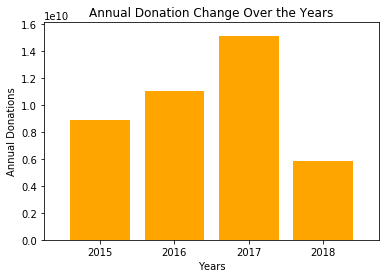

<Figure size 432x288 with 0 Axes>

In [10]:
# Create a bar chart based upon the above data
plt.bar(x_axis, Annual_Donations, color="orange", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Years)

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

# Set the limits of the y axis
plt.ylim(0, max(Annual_Donations)+1000000000)

# Give the chart a title, x label, and y label
plt.title("Annual Donation Change Over the Years")
plt.xlabel("Years")
plt.ylabel("Annual Donations")

# Save an image of the chart and print it to the screen
plt.show()
plt.savefig("Annual Donation Change Over the Years.png")

### Creating a Graph Analysis for the Correlation between the Donation from Donor's Source of Wealth to each Cause

In [11]:
# Removing $ from original DataFrame
CD['Gift Value'] = CD["Gift Value"].replace('[\$,]', '', regex=True).astype(float)
# Extracting "Year","Donor's Source of Wealth","Cause", and "Gift Value" columns into a new Dataframe
CD1 = CD[["Year","Donor's Source of Wealth","Cause", "Gift Value"]]
CD1.head()

,Year,Donor's Source of Wealth,Cause,Gift Value
0,2015,Real estate,Community foundations,605000000.0
1,2015,Finance,Colleges and universities,400000000.0
2,2015,Manufacturing,Arts,400000000.0
3,2015,Family wealth,Colleges and universities,300000000.0
4,2015,Oil,Health,150000000.0


In [12]:
# Calculating the total amount donated from each Donor's Source of Wealth
CD2 = CD.groupby("Donor's Source of Wealth")["Gift Value"].sum()
CD2.head()

Donor's Source of Wealth
Advertising       50850000.0
Agriculture      311938099.0
Biotechnology     25000000.0
Casinos          122800000.0
Chemicals        315925000.0
Name: Gift Value, dtype: float64

In [13]:
# Converting Results to a DataFrame
SGV = pd.DataFrame(CD2).reset_index()
SGV.head()

,Donor's Source of Wealth,Gift Value
0,Advertising,50850000.0
1,Agriculture,311938099.0
2,Biotechnology,25000000.0
3,Casinos,122800000.0
4,Chemicals,315925000.0


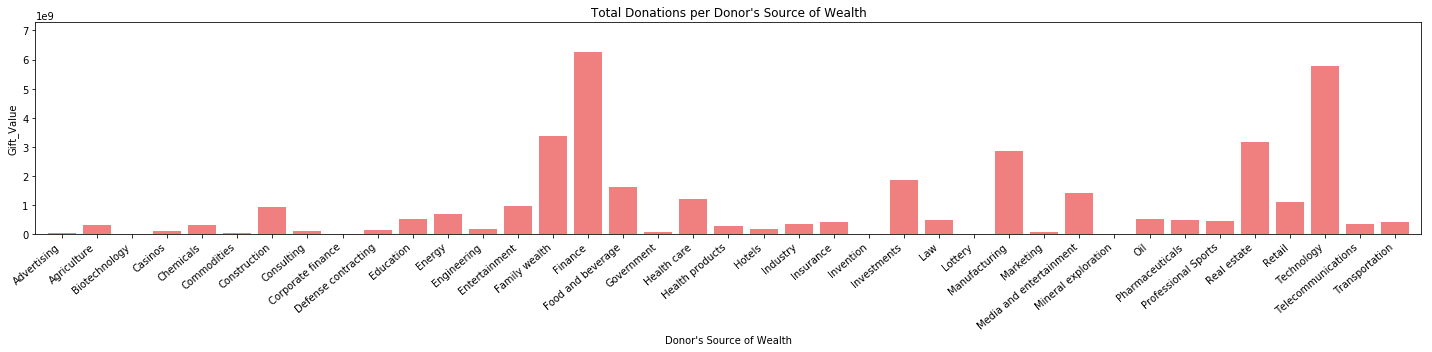

In [14]:
#Setting Y-axis and X-axis
Donors_Source_of_Wealth = SGV["Donor's Source of Wealth"]
Gift_Value = SGV["Gift Value"]
x_axis = np.arange(len(Gift_Value))

plt.figure(figsize=(20,5))

# Create a bar chart based upon the above data
plt.bar(x_axis, Gift_Value, color="lightcoral", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Donors_Source_of_Wealth, rotation=40, ha="right")

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

# Set the limits of the y axis
plt.ylim(0, max(Gift_Value)+1000000000)

# Give the chart a title, x label, and y label
plt.title("Total Donations per Donor's Source of Wealth")
plt.xlabel("Donor's Source of Wealth")
plt.ylabel("Gift_Value")
plt.tight_layout()
# Save an image of the chart and print it to the screen
plt.savefig("Total Donations per Donor's Source of Wealth.png")
plt.show()

In [15]:
# Calculating the total amount donated to each Cause
CD3 = CD.groupby("Cause")["Gift Value"].sum()
CD3.head()

Cause
Arts                                2.629590e+09
Children and youths                 1.157700e+08
Colleges and universities           2.229540e+10
Community foundations               1.534213e+09
Conservation and the environment    1.017400e+08
Name: Gift Value, dtype: float64

In [16]:
# Converting Results to a DataFrame
CGV = pd.DataFrame(CD3).reset_index()
CGV.head()

,Cause,Gift Value
0,Arts,2.629590e+09
1,Children and youths,1.157700e+08
2,Colleges and universities,2.229540e+10
3,Community foundations,1.534213e+09
4,Conservation and the environment,1.017400e+08


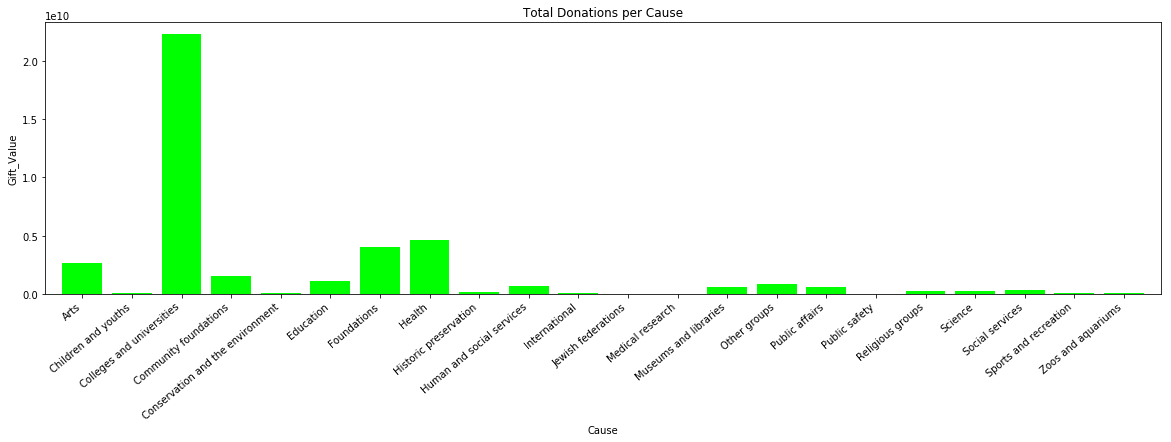

In [17]:
#Setting Y-axis and X-axis
Cause = CGV["Cause"]
Gift_Value = CGV["Gift Value"]
x_axis = np.arange(len(Gift_Value))

plt.figure(figsize=(20,5))

# Create a bar chart based upon the above data
plt.bar(x_axis, Gift_Value, color="lime", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Cause, rotation=40, ha="right")

# Set the limits of the x axis
plt.xlim(-0.75, len(x_axis)-0.25)

# Set the limits of the y axis
plt.ylim(0, max(Gift_Value)+1000000000)

# Give the chart a title, x label, and y label
plt.title("Total Donations per Cause")
plt.xlabel("Cause")
plt.ylabel("Gift_Value")

# Save an image of the chart and print it to the screen
plt.savefig("Total Donations per Cause.png")
plt.show()

In [18]:
# Deriving the different Causes to which each Donor's Source of Wealth donated to
CD4 = CD1.groupby("Donor's Source of Wealth")["Cause"].unique()
CD5 = pd.DataFrame(CD4).reset_index()
CD5.head()

,Donor's Source of Wealth,Cause
0,Advertising,"[Colleges and universities, Foundations, Other..."
1,Agriculture,"[Public affairs, Colleges and universities, Re..."
2,Biotechnology,"[Colleges and universities, Other groups, Health]"
3,Casinos,"[Human and social services, Colleges and unive..."
4,Chemicals,"[Colleges and universities, Health, Education,..."


In [19]:
Causes = CD5["Cause"].apply(pd.Series)
Causes = Causes.rename(columns = lambda x : 'Cause_' + str(x))
CD6 = pd.concat([CD5[:], Causes[:]], axis=1)
CD6.drop("Cause", 1)

,Donor's Source of Wealth,Cause_0,Cause_1,Cause_2,Cause_3,Cause_4,Cause_5,Cause_6,Cause_7,Cause_8,...,Cause_13,Cause_14,Cause_15,Cause_16,Cause_17,Cause_18,Cause_19,Cause_20,Cause_21,Cause_22
0,Advertising,Colleges and universities,Foundations,Other groups,Public affairs,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Agriculture,Public affairs,Colleges and universities,Religious groups,Health,Human and social services,Other groups,Community foundations,Museums and libraries,Education,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Biotechnology,Colleges and universities,Other groups,Health,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Casinos,Human and social services,Colleges and universities,Arts,Health,International,Other groups,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Chemicals,Colleges and universities,Health,Education,Arts,Science,Zoos and aquariums,Museums and libraries,Jewish federations,Community foundations,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Commodities,Colleges and universities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Construction,Human and social services,Health,Colleges and universities,Foundations,Museums and libraries,Sports and recreation,Arts,Zoos and aquariums,Education,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Consulting,Colleges and universities,Health,Museums and libraries,Human and social services,Conservation and the environment,Education,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Corporate finance,Colleges and universities,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Defense contracting,Colleges and universities,Health,Human and social services,Arts,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
